# Comparison of ML model and OGGM, PYGEM, GLOGEM on decadal glacier-wide mass balance

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


In [209]:
# Get glacier-wide mass balances

# ML-model
#filepath_pred = 'C:/Users/kasj/ML_MB_Norway/Data/glacier_predictions/with_predictions_2024-10-24_10-30-28/all_glaciers_predictions.csv'
filepath_pred = 'C:/Users/kasj/ML_MB_Norway/Data/glacier_predictions/with_predictions_2024-10-25_09-45-30/all_glaciers_predictions.csv'
df_pred = pd.read_csv(filepath_pred)
df_pred = df_pred.rename(columns={'year':'Year','Ba_pred':'Ba','Bs_pred':'Bs','Bw_pred':'Bw'})

# GloGEM
filepath_glogem = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/GLOGEM_annual_seasonal_glacier_wide.csv'
df_glogem = pd.read_csv(filepath_glogem)
df_glogem = df_glogem.rename(columns={'ID':'RGIID'})

# OGGM
filepath_oggm = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/OGGM_annual_seasonal_glacier_wide.csv'
df_oggm = pd.read_csv(filepath_oggm)
df_oggm = df_oggm.rename(columns={'year':'Year'})

# PyGEM
filepath_pygem = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/PYGEM_annual_seasonal_glacier_wide.csv'
df_pygem = pd.read_csv(filepath_pygem)


In [210]:
df_obs

,Year,RGIID,BREID,DateMinPrevYear,DateMax,DateMin,Area,Bw,Bs,Ba,Bcalv
2,1989,RGI60-08.01258,54,NaN,24.05.1989,19.10.1989,3.621,2.38,-2.98,-0.60,NaN
3,1990,RGI60-08.01258,54,19.10.1989,24.05.1990,05.09.1990,3.621,2.60,-2.98,-0.38,NaN
4,1991,RGI60-08.01258,54,05.09.1990,14.05.1991,04.10.1991,3.621,2.25,-2.29,-0.04,NaN
5,1992,RGI60-08.01258,54,04.10.1991,03.06.1992,22.09.1992,3.621,2.58,-2.37,0.22,NaN
6,1993,RGI60-08.01258,54,22.09.1992,15.05.1993,22.09.1993,3.621,2.49,-2.34,0.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...
759,2013,RGI60-08.02969,3141,12.10.2012,29.05.2013,24.09.2013,22.541,2.49,-3.29,-0.80,NaN
760,2014,RGI60-08.02969,3141,24.09.2013,24.04.2014,14.10.2014,22.541,2.94,-3.68,-0.74,NaN
761,2015,RGI60-08.02969,3141,14.10.2014,22.04.2015,14.10.2015,22.541,2.90,-1.54,1.36,NaN
762,2016,RGI60-08.02969,3141,14.10.2015,28.04.2016,06.10.2016,22.539,2.92,-2.85,0.07,NaN


In [211]:
# Get data for common time period and merge with observations

test_glaciers = ['00434', '00449', '01013', '01026', '01258', '01286', '01484', '01598', '02384', '02650', '02916', '02918', '02920', '02969']
train_glaciers = ['00287','00295','00868','00966','00987','01126','01186','01217','01657','01779','02017','02436','02458','02643','02666','02962','02963','02966']
all_glaciers = test_glaciers + train_glaciers

# Set the start and end years for the filter
start_year = 1980
end_year = 2019

gl = 'test'

# Function to filter DataFrame based on RGIID ending and year range
def filter_df_by_rgiid_and_year(df, test_glaciers, start_year, end_year):
    return df[df['RGIID'].str.endswith(tuple(test_glaciers)) & (df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Filter the DataFrames
#df_obs_nonan = df_obs.dropna(subset=['RGIID'])

if gl == 'test':
    #df_obs_nonan = filter_df_by_rgiid_and_year(df_obs_nonan, test_glaciers, start_year, end_year)
    df_pred_filtered = filter_df_by_rgiid_and_year(df_pred, test_glaciers, start_year, end_year)
    df_oggm_filtered = filter_df_by_rgiid_and_year(df_oggm, test_glaciers, start_year, end_year)
    df_glogem_filtered = filter_df_by_rgiid_and_year(df_glogem, test_glaciers, start_year, end_year)
    df_pygem_filtered = filter_df_by_rgiid_and_year(df_pygem, test_glaciers, start_year, end_year)
elif gl == 'all':
    #df_obs_nonan = filter_df_by_rgiid_and_year(df_obs_nonan, all_glaciers, start_year, end_year)
    df_pred_filtered = filter_df_by_rgiid_and_year(df_pred, all_glaciers, start_year, end_year)
    df_oggm_filtered = filter_df_by_rgiid_and_year(df_oggm, all_glaciers, start_year, end_year)
    df_glogem_filtered = filter_df_by_rgiid_and_year(df_glogem, all_glaciers, start_year, end_year)
    df_pygem_filtered = filter_df_by_rgiid_and_year(df_pygem, all_glaciers, start_year, end_year)

# Function to rename columns based on model name
def rename_columns(df, model_name):
    return df.rename(columns={
        'Ba': f'Ba_{model_name}',
        'Bs': f'Bs_{model_name}',
        'Bw': f'Bw_{model_name}'
    })

# Renaming columns of the filtered DataFrames
df_pred_filtered = rename_columns(df_pred_filtered, 'ML')
df_oggm_filtered = rename_columns(df_oggm_filtered, 'OGGM')
df_glogem_filtered = rename_columns(df_glogem_filtered, 'GloGEM')
df_pygem_filtered = rename_columns(df_pygem_filtered, 'PyGEM')

# Merging DataFrames on 'RGIID' and 'Year'
dfs = [df_pred_filtered, df_oggm_filtered, df_glogem_filtered, df_pygem_filtered]
merged_df = dfs[0]

for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['RGIID', 'Year'], how='outer')

merged_df

# List of model DataFrames and corresponding labels
#models = [(df_pred_filtered, 'ML'), (df_oggm_filtered, 'OGGM'), (df_glogem_filtered, 'GloGEM'), (df_pygem_filtered, 'PyGEM')]
    
# Merge observed and model DataFrames on 'RGIID' and 'Year'
#merged_dfs = [(df_obs_nonan.merge(model, how='inner', on=['RGIID', 'Year']), label) for model, label in models]


,Year,Ba_ML,Bw_ML,Bs_ML,BREID,RGIID,Ba_OGGM,Bw_OGGM,Bs_OGGM,Ba_GloGEM,Bw_GloGEM,Bs_GloGEM,Ba_PyGEM,Bw_PyGEM,Bs_PyGEM
0,1980,-2.109684,1.798708,-3.908392,2320,RGI60-08.00434,-1.626255,2.128360,-3.754614,-1.7791,1.6583,-3.4374,-1.890020,2.111056,-4.001075
1,1981,-0.319364,2.650396,-2.969760,2320,RGI60-08.00434,1.073543,3.993685,-2.920142,0.6827,2.8633,-2.1806,0.614563,3.528565,-2.914003
2,1982,-0.746039,2.142429,-2.888468,2320,RGI60-08.00434,-0.612871,2.296168,-2.909038,0.1771,1.9766,-1.7995,0.160895,2.474489,-2.313594
3,1983,-0.090674,2.633894,-2.724568,2320,RGI60-08.00434,1.013410,3.657972,-2.644562,0.8791,2.7590,-1.8799,0.993628,3.508433,-2.514805
4,1984,-0.398411,2.684650,-3.083061,2320,RGI60-08.00434,0.622619,3.746796,-3.124177,0.6311,2.9167,-2.2856,0.696375,3.637195,-2.940820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2015,1.953001,3.831847,-1.878846,3141,RGI60-08.02969,1.344163,3.653286,-2.309123,1.2732,2.6991,-1.4259,1.630081,3.771588,-2.141506
556,2016,-0.265281,3.064633,-3.329914,3141,RGI60-08.02969,-0.570878,2.973452,-3.544329,-0.0816,2.7854,-2.8670,-0.100690,3.772016,-3.872705
557,2017,0.354229,2.952107,-2.597879,3141,RGI60-08.02969,-0.472488,2.358645,-2.831133,0.3022,2.6099,-2.3077,0.315979,3.590301,-3.274321
558,2018,-0.410896,2.974512,-3.385408,3141,RGI60-08.02969,-0.988100,2.854169,-3.842269,-0.7503,2.5864,-3.3367,-0.810882,3.575969,-4.386851


In [212]:

# Extract relevant columns
ba_columns = ['RGIID', 'Year'] + [col for col in merged_df.columns if col.startswith('Ba_')]
ba_df = merged_df[ba_columns]

# Define the 10-year bins
bins = list(range(1980, 2021, 10))  # From 1980 to 2020, step by 10
labels = [f"{start}-{start+9}" for start in bins[:-1]]

# Create a 'Period' column by cutting the 'Year' into bins
ba_df['Period'] = pd.cut(ba_df['Year'], bins=bins, labels=labels, right=False)

# Group by 'RGIID' and 'Period' and then calculate the mean for each
aggregated_df = ba_df.groupby(['RGIID', 'Period']).mean().reset_index()

# Drop the 'Year' column if it's still present
if 'Year' in aggregated_df.columns:
    aggregated_df = aggregated_df.drop(columns=['Year'])

aggregated_df

C:\Users\kasj\AppData\Local\Temp\ipykernel_8080\4257160420.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RGIID,Period,Ba_ML,Ba_OGGM,Ba_GloGEM,Ba_PyGEM
0,RGI60-08.00434,1980-1989,-0.481219,0.133267,0.22150,0.284340
1,RGI60-08.00434,1990-1999,-0.412383,0.350588,0.29478,0.288122
2,RGI60-08.00434,2000-2009,-1.103623,-0.795115,-0.72930,-0.813799
3,RGI60-08.00434,2010-2019,-1.246293,-1.010734,-0.66855,-0.755325
4,RGI60-08.00449,1980-1989,-0.437402,-0.173758,-0.10829,0.030676
5,RGI60-08.00449,1990-1999,-0.684273,-0.304879,-0.30966,-0.296910
6,RGI60-08.00449,2000-2009,-0.923558,-0.872126,-0.73664,-0.689879
7,RGI60-08.00449,2010-2019,-1.175908,-0.826747,-0.64537,-0.621773
8,RGI60-08.01013,1980-1989,-0.205306,-0.061932,-0.08284,0.078037
9,RGI60-08.01013,1990-1999,-0.507685,-0.216280,-0.31335,-0.266920


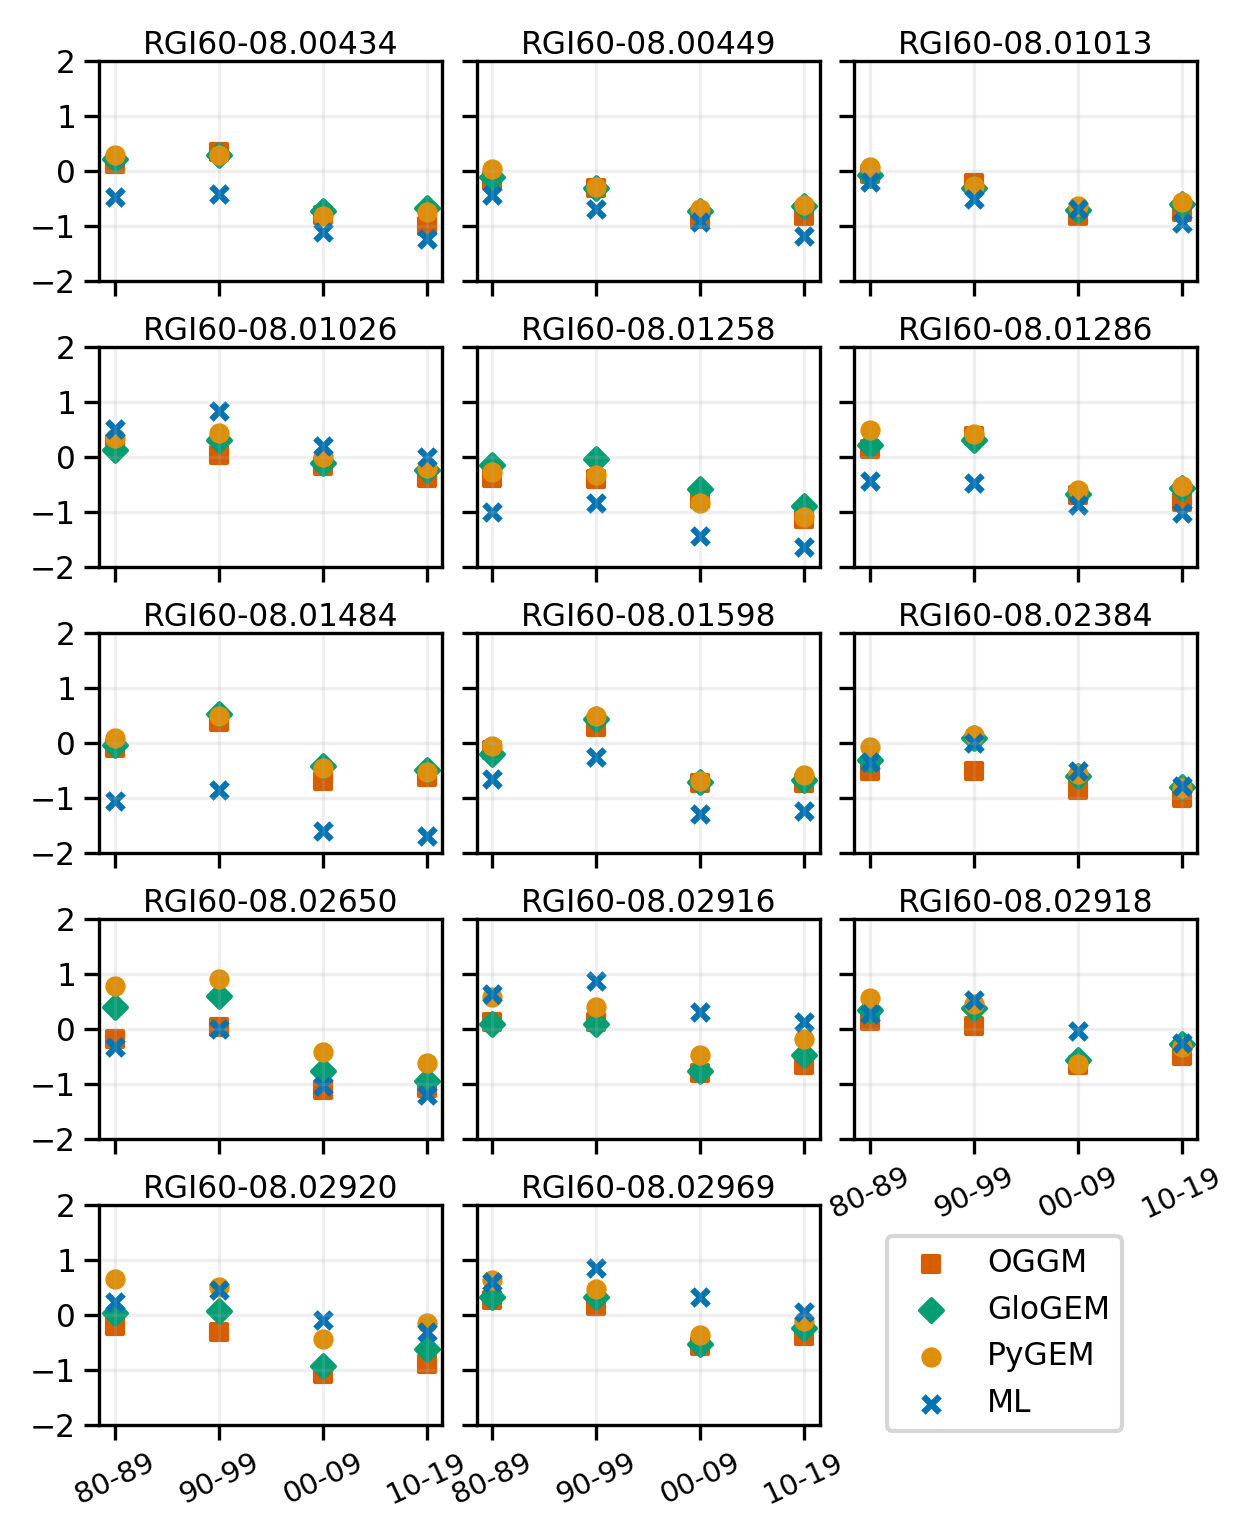

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_subplots(df):
    # Get unique RGIIDs
    unique_rgiids = df['RGIID'].unique()
    n = len(unique_rgiids)
    ncols = 3
    nrows = (n + ncols - 1) // ncols  # Correctly calculate the number of rows needed

    # Create a color palette
    #colors = sns.color_palette("husl", 4)
    #colors = sns.color_palette("colorblind",4)
    colors = sns.color_palette("colorblind", 4)[::-1] # reverse order

    model_colors = dict(zip(['Ba_OGGM', 'Ba_GloGEM', 'Ba_PyGEM', 'Ba_ML'], colors))
    model_labels = {'Ba_ML': 'ML', 'Ba_OGGM': 'OGGM', 'Ba_GloGEM': 'GloGEM', 'Ba_PyGEM': 'PyGEM'}
    model_markers = {'Ba_ML': 'x', 'Ba_OGGM': 's', 'Ba_GloGEM': 'D', 'Ba_PyGEM': 'o'}  # Different markers for each model

    cm = 1/2.54
    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(12*cm, nrows * 3*cm), dpi=300, sharey=True)

    plot_index = 0
    periods_labels = ['80-89', '90-99', '00-09', '10-19']
    for i in range(nrows):
        for j in range(ncols):
            if plot_index < n:
                rgiid = unique_rgiids[plot_index]
                rgiid_df = df[df['RGIID'] == rgiid]

                for model, color in model_colors.items():
                    axes[i, j].scatter(rgiid_df['Period'], rgiid_df[model], label=model_labels[model], 
                                       color=color, s=15, marker=model_markers[model])

                axes[i, j].set_title(f'{rgiid}', fontsize=7.5, pad=1)
                # axes[i, j].set_ylabel('Ba')
                axes[i, j].grid(alpha=0.2)
                axes[i, j].tick_params(axis='both', which='major', labelsize=7.5, pad=2)

                # Set y-axis limits and ticks for each subplot
                axes[i, j].set_ylim(-2, 2)
                axes[i, j].set_yticks([-2, -1, 0, 1, 2])

                axes[i, j].set_xticks(range(4))
                axes[i, j].set_xticklabels(periods_labels, rotation=25, fontsize=7)

                # Only set x-tick labels for the bottom row subplots
                if i < nrows - 1:
                    axes[i, j].set_xticklabels([])

                if plot_index == n - 1:
                    # Place legend outside the last filled subplot
                    axes[i, j].legend(loc='lower left', fontsize=7.5, bbox_to_anchor=(1.15, -0.1))

                plot_index += 1
            else:
                axes[i, j].axis('off')  # Turn off any extra empty subplots

        axes[3, 2].set_xticks(range(4))
        axes[3, 2].set_xticklabels(periods_labels, rotation=25, fontsize=7)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.3)

    #pdf_path = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Projects/2022_ML_for_MB_Norway/Figures_paper/'
    #plt.savefig(pdf_path+'comparison_models_decadal_test.pdf', format='pdf', bbox_inches='tight')

plot_scatter_subplots(aggregated_df)


## Add Hugonnet

In [109]:
# Read Hugonnet data
# file: dh_08_rgi60_pergla_rates
# columns: rgiid, period (2000-01-01_2010-01-01 and 2010-01-01_2020-01-01), dmdtda, err_dmdtda

filepath_hugonnet = 'C:/Users/kasj/ML_MB_Norway/Data/data_model_comparison/dh_08_rgi60_pergla_rates.csv'
df_hugo = pd.read_csv(filepath_hugonnet)
df_hugo = df_hugo[['rgiid','period','dmdtda','err_dmdtda']].rename(columns={'period':'Period', 'rgiid':'RGIID', 'dmdtda':'Ba_Hugonnet2021','err_dmdtda':'err_Ba_Hugo'})


In [110]:
# Filter on periods and RGIID
df_hugo = df_hugo[(df_hugo['RGIID'].str.endswith(tuple(test_glaciers))) & (df_hugo['Period'].isin(['2000-01-01_2010-01-01', '2010-01-01_2020-01-01']))]

# Replace periods
df_hugo['Period'] = df_hugo['Period'].replace({'2000-01-01_2010-01-01': '2000-2009','2010-01-01_2020-01-01': '2010-2019'})

df_hugo

,RGIID,Period,Ba_Hugonnet2021,err_Ba_Hugo
18190,RGI60-08.00434,2000-2009,-0.9870,0.1799
18211,RGI60-08.00434,2010-2019,-0.6811,0.1979
18820,RGI60-08.00449,2000-2009,-0.6963,0.2674
18841,RGI60-08.00449,2010-2019,-0.8219,0.2918
42508,RGI60-08.01013,2000-2009,-0.7472,0.2471
42529,RGI60-08.01013,2010-2019,-0.6630,0.2602
43054,RGI60-08.01026,2000-2009,-0.2258,0.3107
43075,RGI60-08.01026,2010-2019,-0.2808,0.2809
52798,RGI60-08.01258,2000-2009,-0.6672,0.3144
52819,RGI60-08.01258,2010-2019,-1.0557,0.2785


In [111]:
# Merge with dataframe with model results
# Merge the dataframes on RGIID and Period
aggregated_df_all = pd.merge(aggregated_df, df_hugo, how='left', on=['RGIID', 'Period'])

aggregated_df_all

,RGIID,Period,Ba_ML,Ba_OGGM,Ba_GloGEM,Ba_PyGEM,Ba_Hugonnet2021,err_Ba_Hugo
0,RGI60-08.00434,1980-1989,-0.443869,0.133267,0.22150,0.284340,NaN,NaN
1,RGI60-08.00434,1990-1999,-0.332880,0.350588,0.29478,0.288122,NaN,NaN
2,RGI60-08.00434,2000-2009,-1.002609,-0.795115,-0.72930,-0.813799,-0.9870,0.1799
3,RGI60-08.00434,2010-2019,-1.228135,-1.010734,-0.66855,-0.755325,-0.6811,0.1979
4,RGI60-08.00449,1980-1989,-0.388202,-0.173758,-0.10829,0.030676,NaN,NaN
5,RGI60-08.00449,1990-1999,-0.496759,-0.304879,-0.30966,-0.296910,NaN,NaN
6,RGI60-08.00449,2000-2009,-0.882891,-0.872126,-0.73664,-0.689879,-0.6963,0.2674
7,RGI60-08.00449,2010-2019,-0.976756,-0.826747,-0.64537,-0.621773,-0.8219,0.2918
8,RGI60-08.01013,1980-1989,-0.163651,-0.061932,-0.08284,0.078037,NaN,NaN
9,RGI60-08.01013,1990-1999,-0.333992,-0.216280,-0.31335,-0.266920,NaN,NaN


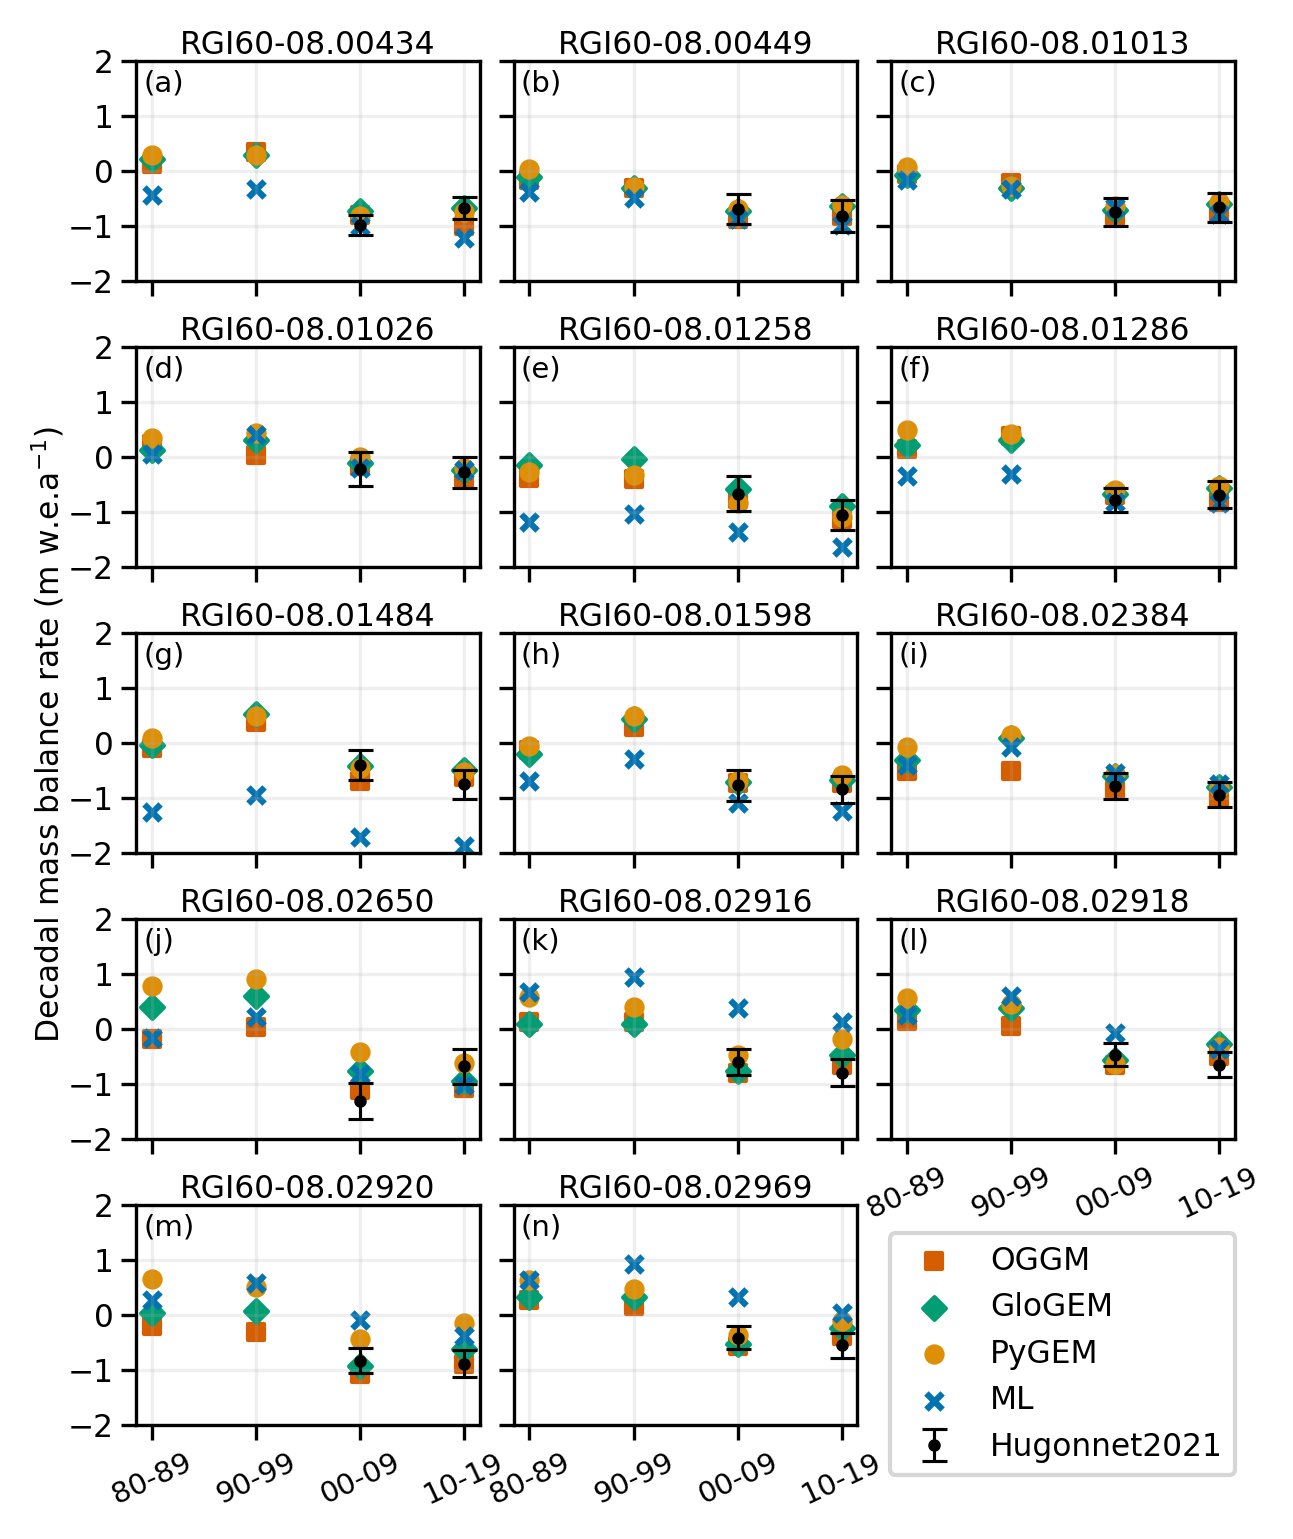

In [137]:
# Plot model comparison with Hugonnet data

def plot_scatter_subplots(df):
    # Get unique RGIIDs
    unique_rgiids = df['RGIID'].unique()
    n = len(unique_rgiids)
    ncols = 3
    nrows = (n + ncols - 1) // ncols  # Correctly calculate the number of rows needed

    # Create a color palette
    colors = sns.color_palette("colorblind", 4)[::-1] # reverse order

    model_colors = dict(zip(['Ba_OGGM', 'Ba_GloGEM', 'Ba_PyGEM', 'Ba_ML'], colors))
    model_labels = {'Ba_ML': 'ML', 'Ba_OGGM': 'OGGM', 'Ba_GloGEM': 'GloGEM', 'Ba_PyGEM': 'PyGEM'}
    model_markers = {'Ba_ML': 'x', 'Ba_OGGM': 's', 'Ba_GloGEM': 'D', 'Ba_PyGEM': 'o'}  # Different markers for each model

    cm = 1/2.54
    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(12*cm, nrows * 3*cm), dpi=300, sharey=True)

    plot_index = 0
    periods_labels = ['80-89', '90-99', '00-09', '10-19']
    for i in range(nrows):
        for j in range(ncols):
            if plot_index < n:
                rgiid = unique_rgiids[plot_index]
                rgiid_df = df[df['RGIID'] == rgiid]

                for model, color in model_colors.items():
                    axes[i, j].scatter(rgiid_df['Period'], rgiid_df[model], label=model_labels[model], 
                                       color=color, s=15, marker=model_markers[model])

                # Plot Ba_Hugonnet2021 with error bars where data is available
                hugonnet_df = rgiid_df.dropna(subset=['Ba_Hugonnet2021'])
                if not hugonnet_df.empty:
                    axes[i, j].errorbar(hugonnet_df['Period'], hugonnet_df['Ba_Hugonnet2021'],
                                        yerr=hugonnet_df['err_Ba_Hugo'], fmt='o', markersize=2,
                                        elinewidth=0.75, color='black', 
                                        capsize=3, capthick=0.75, label='Hugonnet2021')

                axes[i, j].set_title(f'{rgiid}', fontsize=7.5, pad=1)
                axes[i, j].grid(alpha=0.2)
                axes[i, j].tick_params(axis='both', which='major', labelsize=7.5, pad=2)

                # Set y-axis limits and ticks for each subplot
                axes[i, j].set_ylim(-2, 2)
                axes[i, j].set_yticks([-2, -1, 0, 1, 2])

                axes[i, j].set_xticks(range(4))
                axes[i, j].set_xticklabels(periods_labels, rotation=25, fontsize=7)

                # Only set x-tick labels for the bottom row subplots
                if i < nrows - 1:
                    axes[i, j].set_xticklabels([])

                if plot_index == n - 1:
                    # Place legend outside the last filled subplot
                    axes[i, j].legend(loc='lower left', fontsize=7.5, bbox_to_anchor=(1.05, -0.3))

                # Add annotation in the upper left corner
                axes[i, j].annotate(f'({chr(97 + plot_index)})', xy=(0.02, 0.96), xycoords='axes fraction',
                                    fontsize=7, ha='left', va='top')
                plot_index += 1
            else:
                axes[i, j].axis('off')  # Turn off any extra empty subplots

        axes[3, 2].set_xticks(range(4))
        axes[3, 2].set_xticklabels(periods_labels, rotation=25, fontsize=7)
        fig.supylabel('Decadal mass balance rate (m w.e.a$^{-1}$)', fontsize=7.5, x=0.05)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.3)

    #pdf_path = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Projects/2022_ML_for_MB_Norway/Figures_paper/'
    #plt.savefig(pdf_path+'comparison_models_decadal_test_hugo.pdf', format='pdf', bbox_inches='tight')

# Plot the subplots
plot_scatter_subplots(aggregated_df_all)


## Add glaciologcial data

In [144]:
# Glaciological observations
filepath_obs = 'C:/Users/kasj/ML_MB_Norway/Data/NVE_gw_mb/massbalance_gw_Norway.csv'
df_obs = pd.read_csv(filepath_obs, sep=';')

# Filter glaciological obs on RGIID
df_obs = df_obs[(df_obs['RGIID'].notna())]
df_obs = df_obs[(df_obs['RGIID'].str.endswith(tuple(test_glaciers)))]


In [145]:
df_obs

,Year,RGIID,BREID,DateMinPrevYear,DateMax,DateMin,Area,Bw,Bs,Ba,Bcalv
2,1989,RGI60-08.01258,54,NaN,24.05.1989,19.10.1989,3.621,2.38,-2.98,-0.60,NaN
3,1990,RGI60-08.01258,54,19.10.1989,24.05.1990,05.09.1990,3.621,2.60,-2.98,-0.38,NaN
4,1991,RGI60-08.01258,54,05.09.1990,14.05.1991,04.10.1991,3.621,2.25,-2.29,-0.04,NaN
5,1992,RGI60-08.01258,54,04.10.1991,03.06.1992,22.09.1992,3.621,2.58,-2.37,0.22,NaN
6,1993,RGI60-08.01258,54,22.09.1992,15.05.1993,22.09.1993,3.621,2.49,-2.34,0.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...
759,2013,RGI60-08.02969,3141,12.10.2012,29.05.2013,24.09.2013,22.541,2.49,-3.29,-0.80,NaN
760,2014,RGI60-08.02969,3141,24.09.2013,24.04.2014,14.10.2014,22.541,2.94,-3.68,-0.74,NaN
761,2015,RGI60-08.02969,3141,14.10.2014,22.04.2015,14.10.2015,22.541,2.90,-1.54,1.36,NaN
762,2016,RGI60-08.02969,3141,14.10.2015,28.04.2016,06.10.2016,22.539,2.92,-2.85,0.07,NaN


In [186]:
def aggregate_ba_by_periods(df):
    # Filter data for the years within 1980-2019
    period_filter = df['Year'].between(1980, 2019)
    df_filtered = df[period_filter]

    # Define the function to determine the period
    def determine_period(year):
        if 1980 <= year <= 1989:
            return '1980-1989'
        elif 1990 <= year <= 1999:
            return '1990-1999'
        elif 2000 <= year <= 2009:
            return '2000-2009'
        elif 2010 <= year <= 2019:
            return '2010-2019'
        else:
            return None

    df_filtered['Period'] = df_filtered['Year'].apply(determine_period)

    # Ensure counts of years per period and RGIID are as expected (10 years for each period)
    expected_counts = {'1980-1989': 10, '1990-1999': 10, '2000-2009': 10, '2010-2019': 10}
    period_counts = df_filtered.groupby(['RGIID', 'Period'])['Year'].nunique()

    # Filter out periods where year data is incomplete
    complete_periods = period_counts[period_counts == period_counts.index.map(lambda x: expected_counts[x[1]])].index

    # Filter df based on complete periods
    df_complete_periods = df_filtered[
        df_filtered.set_index(['RGIID', 'Period']).index.isin(complete_periods)
    ]

    # Group by RGIID, BREID, and Period and aggregate Ba
    grouped = df_complete_periods.groupby(['RGIID', 'BREID', 'Period'])['Ba','Area'].mean().reset_index()
    grouped.rename(columns={'Ba': 'Ba_Glaciological'}, inplace=True)
    
    return grouped

aggregated_obs_df = aggregate_ba_by_periods(df_obs)

aggregated_obs_df

C:\Users\kasj\AppData\Local\Temp\ipykernel_8080\32047702.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kasj\AppData\Local\Temp\ipykernel_8080\32047702.py:34: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,RGIID,BREID,Period,Ba_Glaciological,Area
0,RGI60-08.00449,2768,1980-1989,-0.291,3.0578
1,RGI60-08.00449,2768,1990-1999,-0.172,3.0470
2,RGI60-08.00449,2768,2000-2009,-0.699,2.9462
3,RGI60-08.00449,2768,2010-2019,-0.934,2.8783
4,RGI60-08.01258,54,2000-2009,-1.225,3.2970
5,RGI60-08.01258,54,2010-2019,-1.065,2.8506
6,RGI60-08.01286,2478,1990-1999,0.090,11.1276
7,RGI60-08.01286,2478,2000-2009,-0.841,10.6290
8,RGI60-08.01286,2478,2010-2019,-0.857,10.3395
9,RGI60-08.02650,2085,1990-1999,0.467,3.1465


In [183]:
# Merge with dataframe with model results
# Merge the dataframes on RGIID and Period
aggregated_obs_df_ = aggregated_obs_df.drop(columns=['BREID','Area'])
aggregated_df_all_obs = pd.merge(aggregated_df_all, aggregated_obs_df_, how='left', on=['RGIID', 'Period'])

aggregated_df_all_obs

,RGIID,Period,Ba_ML,Ba_OGGM,Ba_GloGEM,Ba_PyGEM,Ba_Hugonnet2021,err_Ba_Hugo,Ba_Glaciological
0,RGI60-08.00434,1980-1989,-0.443869,0.133267,0.22150,0.284340,NaN,NaN,NaN
1,RGI60-08.00434,1990-1999,-0.332880,0.350588,0.29478,0.288122,NaN,NaN,NaN
2,RGI60-08.00434,2000-2009,-1.002609,-0.795115,-0.72930,-0.813799,-0.9870,0.1799,NaN
3,RGI60-08.00434,2010-2019,-1.228135,-1.010734,-0.66855,-0.755325,-0.6811,0.1979,NaN
4,RGI60-08.00449,1980-1989,-0.388202,-0.173758,-0.10829,0.030676,NaN,NaN,-0.291
5,RGI60-08.00449,1990-1999,-0.496759,-0.304879,-0.30966,-0.296910,NaN,NaN,-0.172
6,RGI60-08.00449,2000-2009,-0.882891,-0.872126,-0.73664,-0.689879,-0.6963,0.2674,-0.699
7,RGI60-08.00449,2010-2019,-0.976756,-0.826747,-0.64537,-0.621773,-0.8219,0.2918,-0.934
8,RGI60-08.01013,1980-1989,-0.163651,-0.061932,-0.08284,0.078037,NaN,NaN,NaN
9,RGI60-08.01013,1990-1999,-0.333992,-0.216280,-0.31335,-0.266920,NaN,NaN,NaN


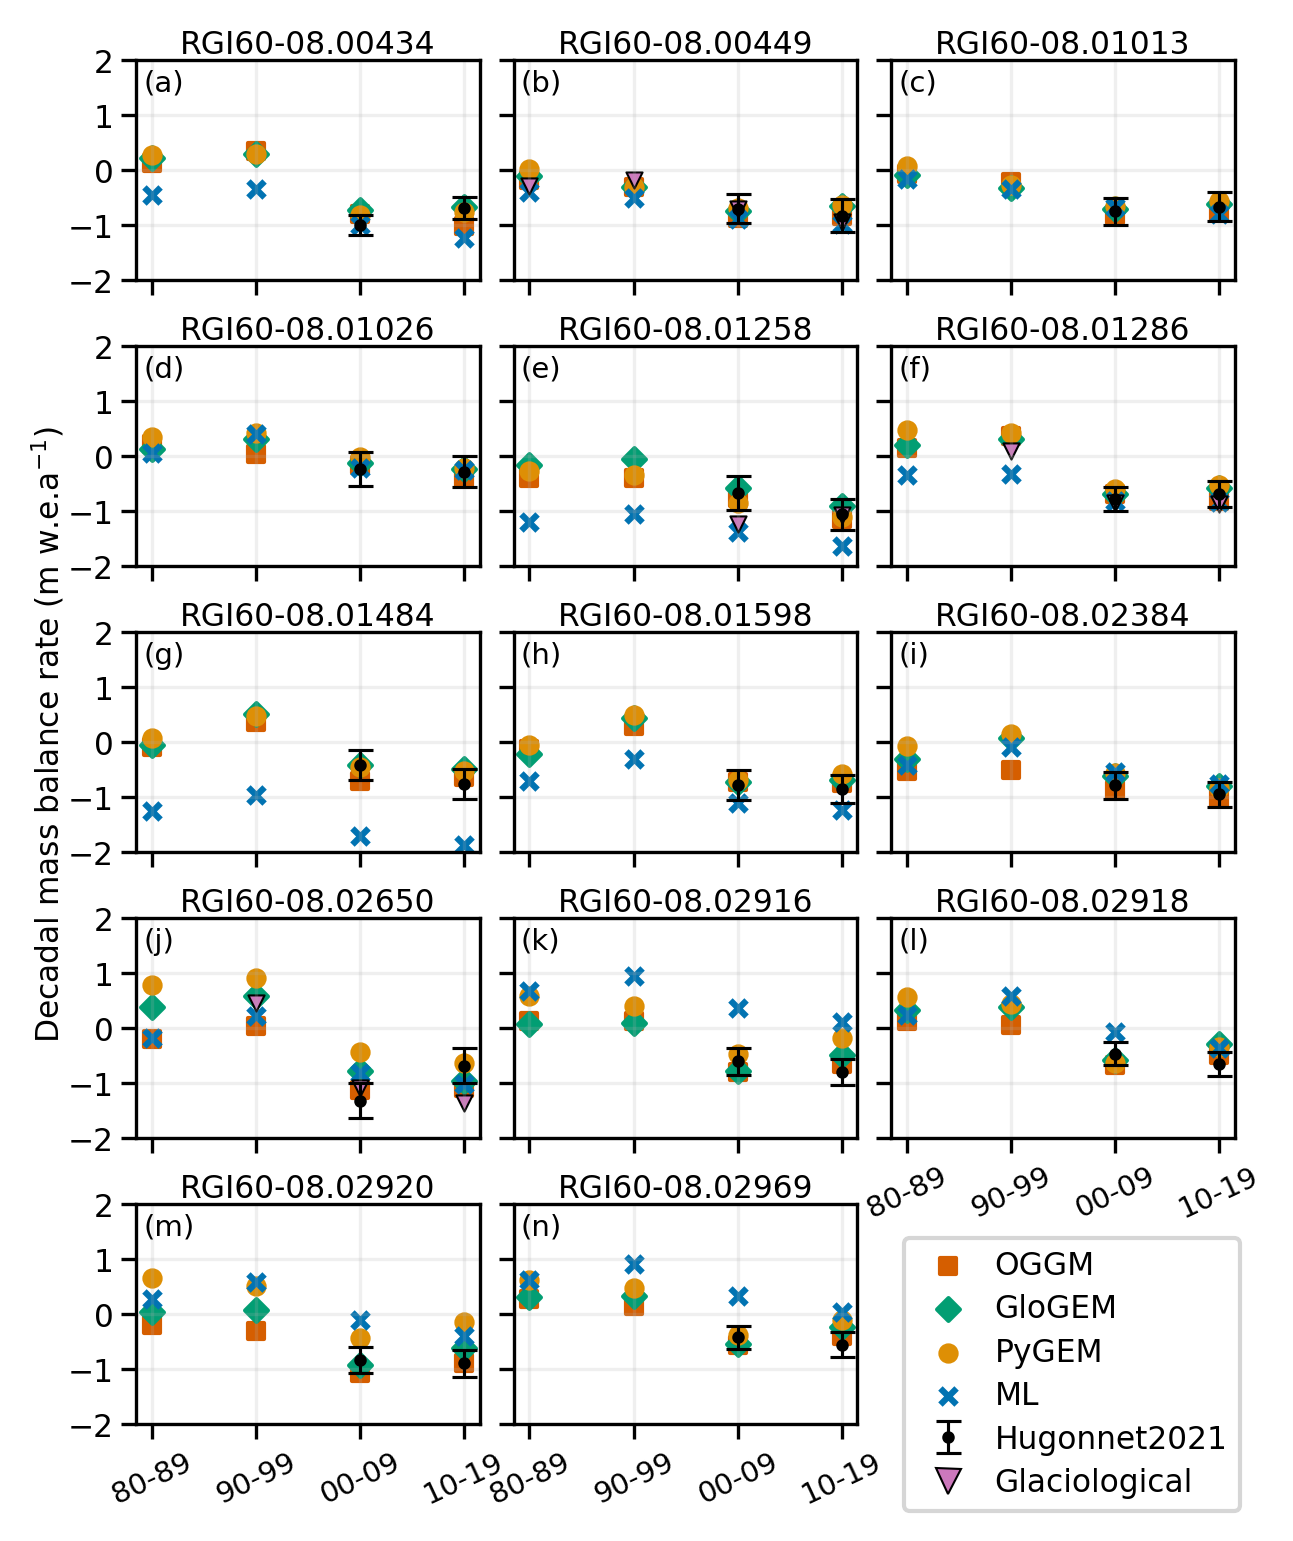

In [180]:
from matplotlib.lines import Line2D
def plot_scatter_subplots(df):
    # Get unique RGIIDs
    unique_rgiids = df['RGIID'].unique()
    n = len(unique_rgiids)
    ncols = 3
    nrows = (n + ncols - 1) // ncols  # Correctly calculate the number of rows needed

    # Create a color palette
    colors = sns.color_palette("colorblind", 4)[::-1]  # Reverse order

    model_colors = dict(zip(['Ba_OGGM', 'Ba_GloGEM', 'Ba_PyGEM', 'Ba_ML'], colors))
    model_labels = {'Ba_ML': 'ML', 'Ba_OGGM': 'OGGM', 'Ba_GloGEM': 'GloGEM', 'Ba_PyGEM': 'PyGEM'}
    model_markers = {'Ba_ML': 'x', 'Ba_OGGM': 's', 'Ba_GloGEM': 'D', 'Ba_PyGEM': 'o'}  # Different markers for each model

    cm = 1 / 2.54
    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(12 * cm, nrows * 3 * cm), dpi=300, sharey=True)

    plot_index = 0
    periods_labels = ['80-89', '90-99', '00-09', '10-19']
    for i in range(nrows):
        for j in range(ncols):
            if plot_index < n:
                rgiid = unique_rgiids[plot_index]
                rgiid_df = df[df['RGIID'] == rgiid]

                for model, color in model_colors.items():
                    axes[i, j].scatter(rgiid_df['Period'], rgiid_df[model], label=model_labels[model],
                                       color=color, s=15, marker=model_markers[model])

                # Plot Ba_Hugonnet2021 with error bars where data is available
                hugonnet_df = rgiid_df.dropna(subset=['Ba_Hugonnet2021'])
                if not hugonnet_df.empty:
                    axes[i, j].errorbar(hugonnet_df['Period'], hugonnet_df['Ba_Hugonnet2021'],
                                        yerr=hugonnet_df['err_Ba_Hugo'], fmt='o', markersize=2,
                                        elinewidth=0.75, color='black',
                                        capsize=3, capthick=0.75, label='Hugonnet2021')

                # Plot Ba_Glaciological
                glaciological_df = rgiid_df.dropna(subset=['Ba_Glaciological'])
                if not glaciological_df.empty:
                    axes[i, j].scatter(glaciological_df['Period'], glaciological_df['Ba_Glaciological'],
                                       label='Glaciological', color=sns.color_palette("colorblind", 5)[-1], 
                                       s=15, marker='v', edgecolor='k', linewidth=0.5)

                axes[i, j].set_title(f'{rgiid}', fontsize=7.5, pad=1)
                axes[i, j].grid(alpha=0.2)
                axes[i, j].tick_params(axis='both', which='major', labelsize=7.5, pad=2)

                # Set y-axis limits and ticks for each subplot
                axes[i, j].set_ylim(-2, 2)
                axes[i, j].set_yticks([-2, -1, 0, 1, 2])

                axes[i, j].set_xticks(range(4))
                axes[i, j].set_xticklabels(periods_labels, rotation=25, fontsize=7)

                # Only set x-tick labels for the bottom row subplots
                if i < nrows - 1:
                    axes[i, j].set_xticklabels([])

                if plot_index == n - 1:
                    # Place legend outside the last filled subplot
                    handles, labels = axes[i, j].get_legend_handles_labels()
                    # Add a dummy handle for 'Glaciological' if not present
                    if 'Glaciological' not in labels:
                        handles.append(plt.Line2D([], [], color=sns.color_palette("colorblind", 5)[-1], marker='v', 
                                                  linestyle='', markeredgewidth=0.5, markeredgecolor='k',label='Glaciological'))
                        labels.append('Glaciological')
                    axes[i, j].legend(handles=handles, loc='lower left', fontsize=7.5, bbox_to_anchor=(1.1, -0.45), labelspacing=0.4,
                                      borderaxespad=0.4, handletextpad=0.5)

                # Add annotation in the upper left corner
                axes[i, j].annotate(f'({chr(97 + plot_index)})', xy=(0.02, 0.96), xycoords='axes fraction',
                                    fontsize=7, ha='left', va='top')
                plot_index += 1
            else:
                axes[i, j].axis('off')  # Turn off any extra empty subplots

        fig.supylabel('Decadal mass balance rate (m w.e.a$^{-1}$)', fontsize=7.5, x=0.05)
        axes[3, 2].set_xticks(range(4))
        axes[3, 2].set_xticklabels(periods_labels, rotation=25, fontsize=7)

    plt.subplots_adjust(wspace=0.1, hspace=0.3)

    # Uncomment to save the figure
    #pdf_path = 'C:/Users/kasj/OneDrive - Høgskulen på Vestlandet/Projects/2022_ML_for_MB_Norway/Figures_paper/'
    #plt.savefig(pdf_path+'comparison_models_decadal_test_hugo_glac.pdf', format='pdf', bbox_inches='tight')

# Plot the subplots
plot_scatter_subplots(aggregated_df_all_obs)
